Filename: ../data/fits/PROMISE-Q1-8micron-filled-v0_3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   (120000, 12000)   float32   


C:\Users\Emrik\AppData\Local\Temp\ipykernel_1660\3878173210.py:11: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ip.magic("reload_ext autoreload")  # these will enable module autoreloading
C:\Users\Emrik\AppData\Local\Temp\ipykernel_1660\3878173210.py:12: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ip.magic("autoreload 2")


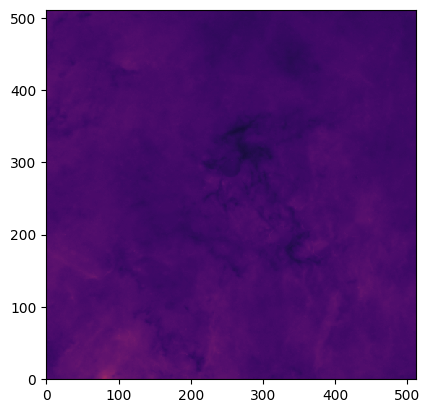

In [5]:
from script.cloud_detection import *
from astropy.io import fits
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
from IPython import get_ipython
ip = get_ipython()
ip.magic("reload_ext autoreload")  # these will enable module autoreloading
ip.magic("autoreload 2")

FITS_PATH = '../data/fits/PROMISE-Q1-8micron-filled-v0_3.fits'
# FITS_PATH = '../cnn/fits_for_annotation/box(50316.355, 6033.3671, 234.3168, 178.3296, 0.0).fits'

XSIZE: int = 512
YSIZE: int = 512
X: int = 49300
Y: int = 6000

# Open currimg and display info using memmap to not load the whole image into memory
imageHDU = fits.open(FITS_PATH, memmap=True, mode='denywrite')
imageHDU.info()

# Get display image as Numpy Array called data
data = np.array(imageHDU[0].data[Y:Y+YSIZE, X:X+XSIZE], dtype=np.float32) # type: ignore
imageHDU.close() # Close the file

plt.style.use({"image.origin": "lower", "image.interpolation": "nearest"})
cmap1 = ListedColormap(['none', 'white'])

# Display data
plt.imshow(data, cmap='inferno', vmin=0, vmax=500) #nipy_spectral, inferno, plasma, magma, viridis <- all good

{'x_center': 49511, 'y_center': 6020, 'approx_size': 109, 'box_x1': 49508, 'box_x2': 49517, 'box_y1': 6011, 'box_y2': 6029, 'min_value': 74.11738586425781, 'max_value': 113.99927520751953, 'circularity': 2.5892899753594514, 'mask_file': '49511_6020_pURYIWo.npy'}
Number of objects: 12


c:\Users\Emrik\OneDrive - Chalmers\Dokument\Programmering\Chalmers\starseed\src\script\cloud_detection.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  circularity[i] = ((4 * np.pi * (np.sum(mask))) / np.power(np.sum(np.bitwise_xor(scipy.ndimage.binary_dilation(mask), mask)), 2))


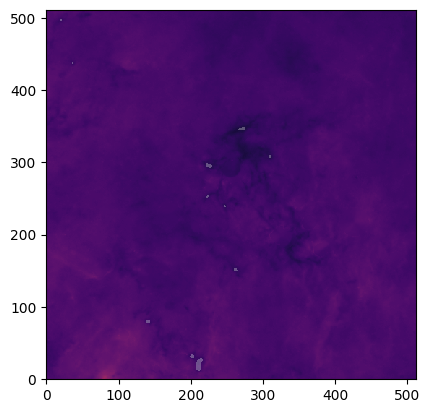

In [13]:
data_path = "../data/"

mass_centers, objects, new_labels, dust_areas_new, remove_small_clouds, min_values, max_values, circularity = detect_clouds(data, 0, 200, 0, "fourier")
output = format_for_ouput(mass_centers, objects, new_labels, dust_areas_new, min_values, max_values, circularity, X, Y, data_path)
save_reg_and_csv(output, "catalog_test", data_path)

print(output[0])

# mark areas in image
# norm = ImageNormalize(stretch=SqrtStretch()) # type: ignore
plt.imshow(data, cmap='inferno', vmin=0, vmax=500)

print("Number of objects: {}".format(len(objects)))

plt.imshow(remove_small_clouds, cmap=cmap1, alpha=0.3)